In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [17]:
M = input("please input the value of M:")

please input the value of M:1


In [18]:
M = int(M)

In [19]:
def max_filter(img, N):
    row, col = img.shape
    img_A = np.zeros_like(img)
    H = np.ones([N, N])
    
    l = N // 2
    H[l, l] = 0
    img_padded = cv2.copyMakeBorder(img, l,l,l,l, cv2.BORDER_CONSTANT, value=0)
    
    for r in range(l, row+l):
        for c in range(l, col+l):
            max_filter = img_padded[r-l:r+l+1, c-l:c+l+1] * H
            img_A[r-l, c-l] = np.max(max_filter)
    return img_A

def min_filter(img, N):
    row, col = img.shape
    img_B = np.zeros_like(img)
    H = np.ones([N, N])
    
    l = N // 2
    H[l, l] = 0
    img_padded = cv2.copyMakeBorder(img, l,l,l,l, cv2.BORDER_CONSTANT, value=255)
    
    for r in range(l, row+l):
        for c in range(l, col+l):
            min_filter = img_padded[r-l:r+l+1, c-l:c+l+1] * H
            min_filter[l, l] = 255
            img_B[r-l, c-l] = np.min(min_filter)
    return img_B

def pic_sub_darkBack(img_a, img_b):
    img_O = np.zeros_like(img_a)
    img_O = cv2.subtract(img_a, img_b)
    return img_O

def pic_sub_brightBack(img_a, img_b):
    img_O = np.zeros_like(img_a)
    row, col = img_a.shape
    for r in range(row):
        for c in range(col):
            img_O[r, c] = img_a[r, c].astype("int32") - img_b[r, c].astype("int32")
            if img_O[r, c] <= 0:
                img_O[r, c] +=255
    return img_O

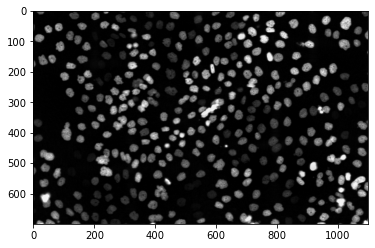

In [20]:
if M == 0:
    img = cv2.imread('./Particles.png', 0)
    img_A = max_filter(img, N = 9)
    img_B = min_filter(img_A, N = 9)
    img_O = pic_sub_brightBack(img, img_B)
    plt.imshow(img_O, 'gray')
    #plt.savefig('img_0, N=9.png')
if M == 1:
    img = cv2.imread('./Cells.png', 0)
    img_A = min_filter(img, N = 33)
    img_B = max_filter(img_A, N = 33)
    img_O = pic_sub_darkBack(img, img_B)
    plt.imshow(img_O, 'gray')
    #plt.savefig('img_1, N=33.png')

In [194]:
#plt.imshow(img_A, 'gray')
#plt.savefig('img_1A, N=33.png')

In [195]:
#plt.imshow(img_B, 'gray')
#plt.savefig('img_1B, N=33.png')